# Shells 2D

## Init symbols for *sympy*

In [4]:
from sympy import *
from sympy.vector import CoordSys3D
N = CoordSys3D('N')
x1, x2 = symbols("x_1 x_2")
alpha1, alpha2 = symbols("alpha_1 alpha_2")
R, L, ga, gv = symbols("R L g_a g_v")
init_printing()

## Cylindrical coordinates

In [5]:
a1 = pi / 2 + (L / 2 - alpha1)/R

x = R * cos(a1)
y = R * sin(a1)

r = x*N.i + y*N.j

#### Curve in 2D coordinates system will be defined with the following vector $\vec{r}=\vec{r(\alpha_1)}$

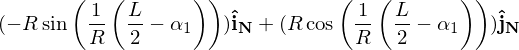

In [6]:
r

#### Tangent to curve

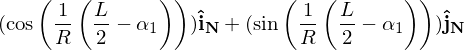

In [7]:
v_temp = r.diff(alpha1)
dr_len = v_temp.magnitude()
v = v_temp / dr_len
v = trigsimp(v)
v_temp

In [8]:
trigsimp(dr_len)

#### Normal to curve

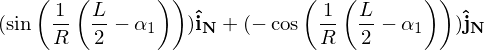

In [9]:
n_temp = v.diff(alpha1)
k=trigsimp(n_temp.magnitude())
n = n_temp/k
q=1/(R*sqrt(1/R**2))
n = trigsimp(n).subs(q, 1)
n

In [10]:
v.dot(n)

In [11]:
n.dot(v)

#### Curvature

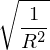

In [12]:
sympify(k)

#### Derivative of base vectors
Let's find 
$\frac { d\vec{n} } { d\alpha_1}$
$\frac { d\vec{v} } { d\alpha_1}$
$\frac { d\vec{n} } { d\alpha_2}$
$\frac { d\vec{v} } { d\alpha_2}$

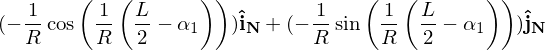

In [13]:
n.diff(alpha1)

$ \frac { d\vec{n} } { d\alpha_1} = -\frac {1}{R} \vec{v} = -k \vec{v} $

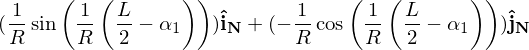

In [14]:
v.diff(alpha1)

$ \frac { d\vec{v} } { d\alpha_1} = \frac {1}{R} \vec{n} = k \vec{n} $

#### Derivative of vectors

$ \vec{u} = u_v \vec{v} + u_n\vec{n} $

$ \frac { d\vec{u} } { d\alpha_1} =  \frac { d(u_v\vec{v}) } { d\alpha_1} + \frac { d(u_n\vec{n}) } { d\alpha_1} = 
 \frac { du_n } { d\alpha_1} \vec{n} + u_n \frac { d\vec{n} } { d\alpha_1} + \frac { du_v } { d\alpha_1} \vec{v} + u_v \frac { d\vec{v} } { d\alpha_1} = \frac { du_n } { d\alpha_1} \vec{n} - u_n k \vec{v} + \frac { du_v } { d\alpha_1} \vec{v} + u_v k \vec{n}$

Then
$ \frac { d\vec{u} } { d\alpha_1} = \left( \frac { du_v } { d\alpha_1} - u_n k \right) \vec{v} + \left( \frac { du_n } { d\alpha_1} + u_v k \right) \vec{n}$

$ \frac { d\vec{u} } { d\alpha_2} = \frac { d(u_n\vec{n}) } { d\alpha_2} + \frac { d(u_v\vec{v}) } { d\alpha_2} = 
 \frac { du_n } { d\alpha_2} \vec{n} + u_n \frac { d\vec{n} } { d\alpha_2} + \frac { du_v } { d\alpha_2} \vec{v} + u_v \frac { d\vec{v} } { d\alpha_2} = \frac { du_n } { d\alpha_2} \vec{n} + \frac { du_v } { d\alpha_2} \vec{v} $

#### Base Vectors $\vec{R}_1, \vec{R}_2$

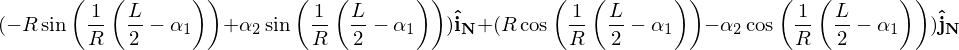

In [15]:
R_alpha=r+alpha2*n
R_alpha

In [16]:
R1=R_alpha.diff(alpha1)
R2=R_alpha.diff(alpha2)

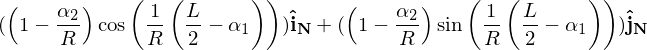

In [17]:
trigsimp(R1)

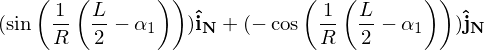

In [18]:
R2

#### Let's find Jacobi matrix:

$ A = \left( 
\begin{array}{cc} 
\frac{\partial x_1}{\partial \alpha_1} & \frac{\partial x_1}{\partial \alpha_2} \\
\frac{\partial x_2}{\partial \alpha_1} & \frac{\partial x_2}{\partial \alpha_2}
\end{array} 
\right)$

$ \left[
\begin{array}{cc} 
\vec{R}_1 & \vec{R}_2
\end{array} 
\right] = \left[
\begin{array}{cc} 
\vec{e}_1 & \vec{e}_2
\end{array} 
\right] \cdot  \left( 
\begin{array}{cc} 
\frac{\partial x_1}{\partial \alpha_1} & \frac{\partial x_1}{\partial \alpha_2} \\
\frac{\partial x_2}{\partial \alpha_1} & \frac{\partial x_2}{\partial \alpha_2}
\end{array} 
\right) = \left[
\begin{array}{cc} 
\vec{e}_1 & \vec{e}_2
\end{array} 
\right] \cdot A$

$ \left[
\begin{array}{cc} 
\vec{e}_1 & \vec{e}_2
\end{array} 
\right] = \left[
\begin{array}{cc} 
\vec{R}_1 & \vec{R}_2
\end{array} 
\right] \cdot A^{-1}$

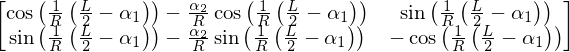

In [19]:
m11=R1.dot(N.i)
m12=R2.dot(N.i)
m21=R1.dot(N.j)
m22=R2.dot(N.j)
A=Matrix([[m11, m12], [m21, m22]])
A

In [20]:
A_inv = trigsimp(A**-1)
sympify(trigsimp(Matrix([R1, R2]).T*A_inv))

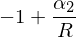

In [21]:
trigsimp(A.det())

#### Metric tensor

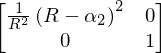

In [22]:
g11=R1.dot(R1)
g12=R1.dot(R2)
g21=R2.dot(R1)
g22=R2.dot(R2)

G=Matrix([[g11, g12],[g21, g22]])
G=trigsimp(G)
G

In [23]:
G_inv = G**-1

#### Derivative of base vectors

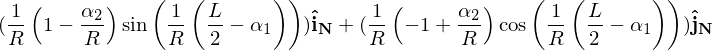

In [31]:
dR1dalpha1 = trigsimp(R1.diff(alpha1))
dR1dalpha1

$ \frac { d\vec{R_1} } { d\alpha_1} = \frac {1}{R} \left( 1-\frac{\alpha_2}{R} \right) \vec{R_2} $

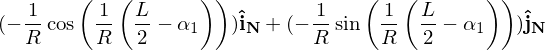

In [32]:
dR1dalpha2 = trigsimp(R1.diff(alpha2))
dR1dalpha2

$ \frac { d\vec{R_1} } { d\alpha_2} = -\frac {1}{R} \frac {1}{1-\frac{\alpha_2}{R}}  \vec{R_1} $

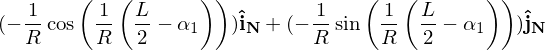

In [33]:
dR2dalpha1 = trigsimp(R2.diff(alpha1))
dR2dalpha1

$ \frac { d\vec{R_2} } { d\alpha_1} = -\frac {1}{R} \frac {1}{1-\frac{\alpha_2}{R}}  \vec{R_1} $

In [27]:
dR2dalpha2 = trigsimp(R2.diff(alpha2))
dR2dalpha2

$ \frac { d\vec{R_2} } { d\alpha_2} = \vec{0} $

#### Derivative of vectors

$ \vec{u} = u^1 \vec{R_1} + u^2\vec{R_2} $

$ \frac { d\vec{u} } { d\alpha_1} =  \frac { d(u^1\vec{R_1}) } { d\alpha_1} + \frac { d(u^2\vec{R_2}) } { d\alpha_1} = 
 \frac { du^1 } { d\alpha_1} \vec{R_1} + u^1 \frac { d\vec{R_1} } { d\alpha_1} + \frac { du^2 } { d\alpha_1} \vec{R_2} + u^2 \frac { d\vec{R_2} } { d\alpha_1} = \frac { du^1 } { d\alpha_1} \vec{R_1} + u^1 \frac {1}{R} \left( 1-\frac{\alpha_2}{R} \right) \vec{R_2} + \frac { du^2 } { d\alpha_1} \vec{R_2} - u^2 \frac {1}{R} \frac {1}{1-\frac{\alpha_2}{R}}  \vec{R_1}$

Then
$ \frac { d\vec{u} } { d\alpha_1} = \left( \frac { du^1 } { d\alpha_1} - u^2 \frac {1}{R} \frac {1}{1-\frac{\alpha_2}{R}}  \right) \vec{R_1} + \left( \frac { du^2 } { d\alpha_1} + u^1 \frac {1}{R} \left( 1-\frac{\alpha_2}{R} \right) \right) \vec{R_2}$

$ \frac { d\vec{u} } { d\alpha_2} = \frac { d(u^1\vec{R_1}) } { d\alpha_2} + \frac { d(u^2\vec{R_2}) } { d\alpha_2} = 
 \frac { du^1 } { d\alpha_2} \vec{R_1} + u^1 \frac { d\vec{R_1} } { d\alpha_2} + \frac { du^2 } { d\alpha_2} \vec{R_2} + u^2 \frac { d\vec{R_2} } { d\alpha_2} = \frac { du^1 } { d\alpha_2} \vec{R_1} - u^1 \frac {1}{R} \frac {1}{1-\frac{\alpha_2}{R}}  \vec{R_1} + \frac { du^2 } { d\alpha_2} \vec{R_2} $
 
 Then
$ \frac { d\vec{u} } { d\alpha_2} = \left( \frac { du^1 } { d\alpha_2}  - u^1 \frac {1}{R} \frac {1}{1-\frac{\alpha_2}{R}} \right) \vec{R_1} + \frac { du^2 } { d\alpha_2} \vec{R_2}$

$\nabla_1 u^1 = \frac { \partial u^1 } { \partial \alpha_1} - u^2 \frac {1}{R} \frac {1}{1-\frac{\alpha_2}{R}}$

$\nabla_1 u^2 = \frac { \partial u^2 } { \partial \alpha_1} + u^1 \frac {1}{R} \left( 1-\frac{\alpha_2}{R} \right) $

$\nabla_2 u^1 = \frac { \partial u^1 } { \partial \alpha_2}  - u^1 \frac {1}{R} \frac {1}{1-\frac{\alpha_2}{R}}$

$\nabla_2 u^2 = \frac { \partial u^2 } { \partial \alpha_2}$

$ \nabla \vec{u} = \left( 
\begin{array}{cc} 
\nabla_1 u^1 & \nabla_1 u^2 \\
\nabla_2 u^1 & \nabla_2 u^2
\end{array} 
\right)$

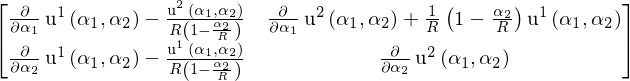

In [44]:
u1=Function('u^1')
u2=Function('u^2')

u1_nabla1 = u1(alpha1, alpha2).diff(alpha1) - u2(alpha1, alpha2) / R * (S(1)/(1-alpha2/R))
u2_nabla1 = u2(alpha1, alpha2).diff(alpha1) + u1(alpha1, alpha2) / R * ( 1-alpha2/R) 
u1_nabla2 = u1(alpha1, alpha2).diff(alpha2) - u1(alpha1, alpha2) / R * (S(1)/(1-alpha2/R))
u2_nabla2 = u2(alpha1, alpha2).diff(alpha2)
# $\nabla_2 u^2 = \frac { \partial u^2 } { \partial \alpha_2}$

grad_u = Matrix([[u1_nabla1, u2_nabla1],[u1_nabla2, u2_nabla2]])
grad_u

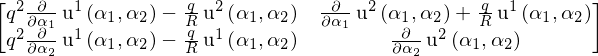

In [59]:
q=Symbol('q')
grad_u_down=grad_u.subs(1-alpha2/R, q)*G.subs((R-alpha2)/R,q)
#grad_u_down=grad_u*G
expand(simplify(grad_u_down))#.subs((R-alpha2)/R, q)

$ 
\left( 
\begin{array}{c} 
\nabla_1 u_1 \\ \nabla_2 u_1 \\
\nabla_1 u_2 \\ \nabla_2 u_2
\end{array} 
\right) 
=  
\left( 
\begin{array}{c}
\left( 1-\frac{\alpha_2}{R} \right)^2  \frac { \partial u^1 } { \partial \alpha_1} - u^2 \frac {\left( 1-\frac{\alpha_2}{R} \right)}{R} \\
\left( 1-\frac{\alpha_2}{R} \right)^2  \frac { \partial u^1 } { \partial \alpha_2} - u^1 \frac {\left( 1-\frac{\alpha_2}{R} \right)}{R} \\
\frac { \partial u^2 } { \partial \alpha_1} + u^1 \frac {\left( 1-\frac{\alpha_2}{R} \right)}{R} \\
\frac { \partial u^2 } { \partial \alpha_2}
\end{array} 
\right)
$

$ 
\left( 
\begin{array}{c} 
\nabla_1 u_1 \\ \nabla_2 u_1 \\
\nabla_1 u_2 \\ \nabla_2 u_2
\end{array} 
\right) 
=  
\left( 
\begin{array}{cccccc}
0 & \left( 1-\frac{\alpha_2}{R} \right)^2 & 0 & -\frac {\left( 1-\frac{\alpha_2}{R} \right)}{R} & 0 & 0 \\
-\frac {\left( 1-\frac{\alpha_2}{R} \right)}{R} & 0 & \left( 1-\frac{\alpha_2}{R} \right)^2 & 0  & 0 & 0 \\
\frac {\left( 1-\frac{\alpha_2}{R} \right)}{R} & 0 & 0 & 0 & 1 & 0  \\
0 & 0 & 0 & 0 & 0 & 1  \\
\end{array} 
\right)
\left( 
\begin{array}{c} 
u^1 \\
\frac { \partial u^1 } { \partial \alpha_1} \\
\frac { \partial u^1 } { \partial \alpha_2} \\
u^2 \\
\frac { \partial u^2 } { \partial \alpha_1} \\
\frac { \partial u^2 } { \partial \alpha_2} \\
\end{array} 
\right) 
$

### Constitutive tensor 

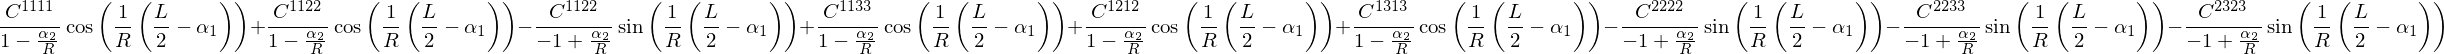

In [77]:
# from sympy.abc import x, y, z

def getCIndecies(index):
    if (index == 0):
        return 0, 0
    elif (index == 1):
        return 1, 1
    elif (index == 2):
        return 2, 2
    elif (index == 3):
        return 0, 1
    elif (index == 4):
        return 0, 2
    elif (index == 5):
        return 1, 2
    

def getCalpha(C, A, q, p, s, t):
    res = S(0)
    for i in range(3):
        for j in range(3):        
            for k in range(3):
                for l in range(3):
                    res += C[i,j,k,l]*A[q,i]
    return res
                    

from sympy import MutableDenseNDimArray
C_x = MutableDenseNDimArray.zeros(3, 3, 3, 3)
C_alpha = MutableDenseNDimArray.zeros(3, 3, 3, 3)

m11=R1.dot(N.i)
m12=R2.dot(N.i)
m21=R1.dot(N.j)
m22=R2.dot(N.j)
A=Matrix([[m11, m12, 0], [m21, m22, 0], [0,0,1]])
A_inv=A**-1

for s in range(6):
    for t in range(s, 6):
        if (s < 3 and t < 3):
            i,j = getCIndecies(s)
            k,l = getCIndecies(t)
            elem_index = 'C^{}{}{}{}'.format(i+1, j+1, k+1, l+1)
            el = Symbol(elem_index)
            C_x[i,j,k,l] = el
            C_x[k,l,i,j] = el
        elif (s==t):
            i,j = getCIndecies(s)
            k,l = getCIndecies(t)
            elem_index = 'C^{}{}{}{}'.format(i+1, j+1, k+1, l+1)
            el = Symbol(elem_index)
            C_x[i,j,k,l] = el

for i in range(3):
    for j in range(3):        
        for k in range(3):
            for l in range(3):
                C_alpha[i,j,k,l] = getCalpha(C_x, A_inv, i, j, k, l)
                
trigsimp(C_alpha[0,2,0,2])


#### Virtual work

In [79]:
def contraction3DSameRank(A,B):
    res = S(0)
    for i in range(3):
        for j in range(3):
            res += A[i,j]*B[j,i]
    return res

def contraction3D(C,e):
    res = MutableDenseNDimArray.zeros(3, 3)
    for i in range(3):
        for j in range(3):
            res[i,j] = S(0)
            for k in range(3):
                for l in range(3):
                    res[i,j] += C[i,j,k,l]*e[k,l]
    return res


In [ ]:
e11 = Symbol("e_{11}")
e12 = Symbol("e_{12}")
e22 = Symbol("e_{22}")
e13 = Symbol("e_{13}")
e23 = Symbol("e_{23}")
e33 = Symbol("e_{33}")
# s11 = Symbol("s_{11}")
# s12 = Symbol("s_{12}")
# s22 = Symbol("s_{22}")

e=Matrix([[e11, e12, e13], [e12, e22, e23], [e13, e23, e33]])

s=contraction3D(C_alpha, e)

E=contraction3DSameRank(s, e)
E

In [30]:
# e_alpha=G*A_inv*e*A_inv.T*G
# #e_alpha=A*e*A.T

# s_alpha=A_inv*s*A_inv.T
# E_alpha=contraction2D(s_alpha, e_alpha)
